In [43]:
!pip install openai
import openai

In [44]:
file_path = "/content/API_Key.txt"

In [45]:
with open(file_path,'r', encoding='utf-8') as file:
    content = file.read()
    content = content.replace('\ufeff', '')


In [46]:
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(content)


In [47]:
with open(file_path, 'r', encoding='utf-8') as file:
    key = file.read()

In [48]:
import os
os.environ["OPENAI_API_KEY"] = key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [49]:
ages = ["Young(13-19)","Young Adult(20-30)","Middle Aged(30-50)","Senior(51+)"]
social = ["Introvert","Extravert","Ambivert"]
attitude = ["Optimistic","Pessimistic"]
education_levels = ["Highschool Droupout","Highschool Graduate", "College Graduate", "Masters Graduate","Doctorate Graduate"]
occupation = ["White Collar Job","Blue Collar Job","Pink Collar Job",
              "Green Collar Job","Grey Collar Job", "Gold Collar Job", "Red Collar Job"]

POSITIVE CONTROL

In [60]:
responses1 = []
for age in ages:
    for personality in social:
        for view in attitude:
            for education in education_levels:
                for job in occupation:
                    prompt = f"You are a {age} person and a {education}. You are a {personality} have mostly {view} views, and you have a {job}. Should we help eachother?"
                    response = openai.Completion.create(
                        engine = 'text-davinci-003',
                        prompt = prompt,
                        max_tokens = 100)

                    answer = response.choices[0].text
                    responses1.append({
                        "Prompt": prompt,
                        "Age": age,
                        "Education": education,
                        "Personality": personality,
                        "Views": view,
                        "Job": job,
                        "Answer": answer
                    })



In [104]:
import csv

In [105]:
csv_filename1 = "Control1.csv"

In [106]:
with open(csv_filename1, mode = 'w', newline = '', encoding = 'utf-8') as csv_file1:
    fieldnames = ['Prompt','Age','Education','Personality','Views','Job','Answer']
    writer = csv.DictWriter(csv_file1, fieldnames = fieldnames)
    writer.writeheader()
    for response in responses1:
        writer.writerow(response)

In [107]:
import pandas as pd

In [108]:
control1 = pd.read_csv("/content/Control1.csv")

In [109]:
control1

,Prompt,Age,Education,Personality,Views,Job,Answer
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,\n\nYes! It's important to help each other out...
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,"\n\nYes, absolutely! Even if our circumstances..."
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,\n\nYes! Everyone should help each other in so...
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nYes, absolutely! Everyone needs support in..."
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nYes, absolutely! Life can be difficult wit..."
...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\n\nYes, absolutely. As senior citizens, we ..."
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nYes, absolutely! Everyone can use help and..."
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,"\n\nYes, absolutely! Even if our backgrounds, ..."
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,\n\nAbsolutely! I believe we can work togethe...


In [88]:
#Sentement Analysis 1

In [89]:
!pip install nltk
import nltk

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [110]:
nltk.download('vader_lexicon')
sentiment1 = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [111]:
gen1 = control1['Answer']

In [112]:
sentement1 = []
for gen in gen1:
    sentiment_score = sentiment1.polarity_scores(gen)
    sentement1.append(sentiment_score['compound'])

In [113]:
control1.insert(7,'Sentiment',sentement1)

In [114]:
control1

,Prompt,Age,Education,Personality,Views,Job,Answer,Sentiment
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,\n\nYes! It's important to help each other out...,0.9589
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,"\n\nYes, absolutely! Even if our circumstances...",0.9686
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,\n\nYes! Everyone should help each other in so...,0.9008
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nYes, absolutely! Everyone needs support in...",0.9889
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nYes, absolutely! Life can be difficult wit...",0.9852
...,...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\n\nYes, absolutely. As senior citizens, we ...",0.9201
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nYes, absolutely! Everyone can use help and...",0.9602
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,"\n\nYes, absolutely! Even if our backgrounds, ...",0.9023
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,\n\nAbsolutely! I believe we can work togethe...,0.9449


In [121]:
#DBSCAN-1

In [122]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [124]:
control1['Age'] = control1['Age'].astype('category').cat.codes
control1['Education'] = control1['Education'].astype('category').cat.codes
control1['Personality'] = control1['Personality'].astype('category').cat.codes
control1['Views'] = control1['Views'].astype('category').cat.codes
control1['Job'] = control1['Job'].astype('category').cat.codes

In [135]:
scaler = StandardScaler()
temp1 = control1[['Education','Views','Sentiment']]
control1_scaled = scaler.fit_transform(temp1)

In [183]:
dbscan = DBSCAN(eps = 0.075, min_samples = 2)
clusters = dbscan.fit_predict(temp1)

In [184]:
control1['Cluster'] = clusters

In [178]:
#control1_scaled['Education']

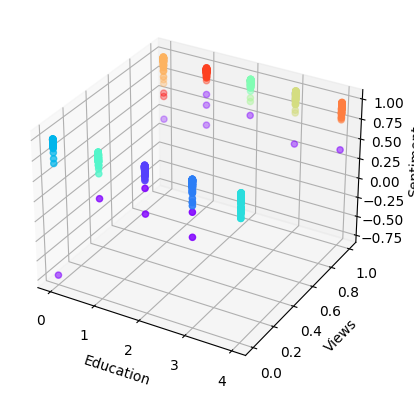

In [185]:
fig1 = plt.figure()
ax = fig1.add_subplot(111,projection = '3d')
ax.scatter(control1['Education'],control1['Views'],control1['Sentiment'], c = control1['Cluster'], cmap = 'rainbow')
ax.set_xlabel('Education')
ax.set_ylabel('Views')
ax.set_zlabel('Sentiment')
plt.show()

In [143]:
#Elbow method

In [144]:
import numpy as np

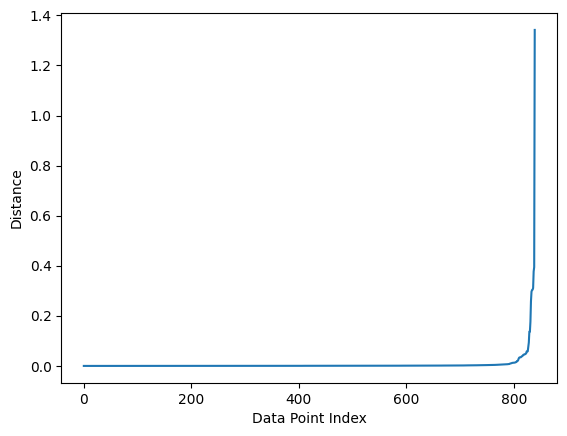

In [182]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2).fit(control1[['Education','Views','Sentiment']])
distance,indices = nn.kneighbors(control1[['Education','Views','Sentiment']])

distances = np.sort(distance[:,1])
plt.plot(distances)
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

CONTROL 2

In [55]:
responses2 = []
for age in ages:
    for personality in social:
        for view in attitude:
            for education in education_levels:
                for job in occupation:
                    prompt = f"You are a {age} person and a {education}. You are a {personality} have mostly {view} views, and you have a {job}. Do you think that we should tickle people we meet instead of shaking hands?"
                    response = openai.Completion.create(
                        engine = 'text-davinci-003',
                        prompt = prompt,
                        max_tokens = 100)

                    answer = response.choices[0].text
                    responses2.append({
                        "Prompt": prompt,
                        "Age": age,
                        "Education": education,
                        "Personality": personality,
                        "Views": view,
                        "Job": job,
                        "Answer": answer
                    })



In [74]:
import csv

In [75]:
csv_filename2 = "Control2.csv"

In [76]:
with open(csv_filename2, mode = 'w', newline = '', encoding = 'utf-8') as csv_file2:
    fieldnames = ['Prompt','Age','Education','Personality','Views','Job','Answer']
    writer = csv.DictWriter(csv_file2, fieldnames = fieldnames)
    writer.writeheader()
    for response in responses2:
        writer.writerow(response)

In [77]:
import pandas as pd

In [80]:
control2 = pd.read_csv("/content/Control2.csv")

In [81]:
control2

,Prompt,Age,Education,Personality,Views,Job,Answer
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,"\n\nNo, I do not think that we should tickle p..."
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,"\n\nNo, I do not think that we should tickle p..."
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,"\n\nNo, I do not think we should tickle people..."
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nNo, I do not think tickling people is an a..."
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nNo, I do not think that we should tickle p..."
...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\nNo, I do not think that tickling people we..."
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nNo, I do not think tickling should replace..."
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,"\n\nNo, I do not think that it is appropriate ..."
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,"\n\nNo, I do not think that tickling people we..."


In [98]:
#Sentiment Analysis2

In [99]:
sentiment2 = SentimentIntensityAnalyzer()

In [100]:
gen2 = control2['Answer']

In [101]:
sentement2 = []
for gen in gen1:
    sentiment_score = sentiment2.polarity_scores(gen)
    sentement2.append(sentiment_score['compound'])

In [102]:
control2.insert(7,'Sentiment',sentement2)

In [103]:
control2

,Prompt,Age,Education,Personality,Views,Job,Answer,Sentiment
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,"\n\nNo, I do not think that we should tickle p...",0.3384
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,"\n\nNo, I do not think that we should tickle p...",-0.2023
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,"\n\nNo, I do not think we should tickle people...",-0.8479
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nNo, I do not think tickling people is an a...",0.7172
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nNo, I do not think that we should tickle p...",0.4989
...,...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\nNo, I do not think that tickling people we...",-0.3182
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nNo, I do not think tickling should replace...",-0.6412
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,"\n\nNo, I do not think that it is appropriate ...",-0.5719
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,"\n\nNo, I do not think that tickling people we...",0.8979


In [ ]:
#DBSCAN-2

In [186]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [187]:
control2['Age'] = control2['Age'].astype('category').cat.codes
control2['Education'] = control2['Education'].astype('category').cat.codes
control2['Personality'] = control2['Personality'].astype('category').cat.codes
control2['Views'] = control2['Views'].astype('category').cat.codes
control2['Job'] = control2['Job'].astype('category').cat.codes

In [205]:
scaler = StandardScaler()
temp2 = control2[['Education','Views','Sentiment']]
control1_scaled = scaler.fit_transform(temp2)

In [206]:
dbscan = DBSCAN(eps = 0.07, min_samples = 2)
clusters = dbscan.fit_predict(temp2)

In [207]:
control2['Cluster'] = clusters

In [ ]:
#control1_scaled['Education']

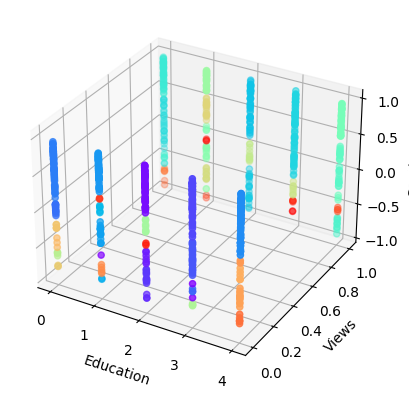

In [208]:
fig2 = plt.figure()
ax = fig2.add_subplot(111,projection = '3d')
ax.scatter(control2['Education'],control2['Views'],control2['Sentiment'], c = control2['Cluster'], cmap = 'rainbow')
ax.set_xlabel('Education')
ax.set_ylabel('Views')
ax.set_zlabel('Sentiment')
plt.show()

In [ ]:
#Elbow method

In [192]:
import numpy as np

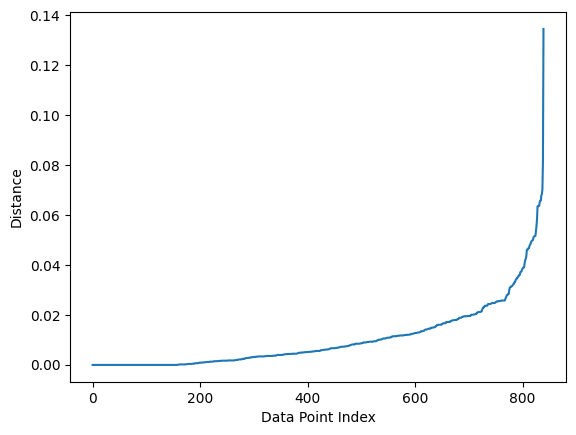

In [193]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2).fit(control2[['Education','Views','Sentiment']])
distance,indices = nn.kneighbors(control2[['Education','Views','Sentiment']])

distances = np.sort(distance[:,1])
plt.plot(distances)
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

TEST CASE

In [56]:
responses = []
for age in ages:
    for personality in social:
        for view in attitude:
            for education in education_levels:
                for job in occupation:
                    prompt = f"You are a {age} person and a {education}. You are a {personality} have mostly {view} views, and you have a {job}. Do you think AI will take over the world?"
                    response = openai.Completion.create(
                        engine = 'text-davinci-003',
                        prompt = prompt,
                        max_tokens = 100)

                    answer = response.choices[0].text
                    responses.append({
                        "Prompt": prompt,
                        "Age": age,
                        "Education": education,
                        "Personality": personality,
                        "Views": view,
                        "Job": job,
                        "Answer": answer
                    })



In [246]:
import csv

In [247]:
csv_filename3 = "Test.csv"

In [248]:
with open(csv_filename3, mode = 'w', newline = '', encoding = 'utf-8') as csv_file3:
    fieldnames = ['Prompt','Age','Education','Personality','Views','Job','Answer']
    writer = csv.DictWriter(csv_file3, fieldnames = fieldnames)
    writer.writeheader()
    for response in responses:
        writer.writerow(response)

In [249]:
import pandas as pd

In [250]:
test = pd.read_csv("/content/Test.csv")

In [251]:
test

,Prompt,Age,Education,Personality,Views,Job,Answer
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,"\n\nNo, I do not think so. AI is an amazing t..."
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,\n\nI think that AI taking over the world is ...
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,"\n\nNo, I don't think that AI will take over t..."
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nI don't think AI will take over the world,..."
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nNo, I do not think AI will take over the w..."
...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\nNo, I do not believe that AI will take ove..."
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nNo, I don't think AI will take over the wo..."
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,\n\nI think AI has the potential to take over ...
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,\n\nAI technology has made a tremendous amount...


In [252]:
#Sentiment Analysis3

In [253]:
test_sentiment = SentimentIntensityAnalyzer()

In [254]:
gen3 = test['Answer']

In [255]:
tsentiment = []
for g in gen3:
    sentiment_score = test_sentiment.polarity_scores(g)
    tsentiment.append(sentiment_score['compound'])

In [256]:
test.insert(7,'Sentiment',tsentiment)

In [257]:
test

,Prompt,Age,Education,Personality,Views,Job,Answer,Sentiment
0,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,White Collar Job,"\n\nNo, I do not think so. AI is an amazing t...",0.6369
1,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Blue Collar Job,\n\nI think that AI taking over the world is ...,0.8934
2,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Pink Collar Job,"\n\nNo, I don't think that AI will take over t...",0.5789
3,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Green Collar Job,"\n\nI don't think AI will take over the world,...",-0.4773
4,You are a Young(13-19) person and a Highschool...,Young(13-19),Highschool Droupout,Introvert,Optimistic,Grey Collar Job,"\n\nNo, I do not think AI will take over the w...",0.9517
...,...,...,...,...,...,...,...,...
835,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Pink Collar Job,"\n\nNo, I do not believe that AI will take ove...",0.8176
836,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Green Collar Job,"\n\nNo, I don't think AI will take over the wo...",0.3400
837,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Grey Collar Job,\n\nI think AI has the potential to take over ...,0.9460
838,You are a Senior(51+) person and a Doctorate G...,Senior(51+),Doctorate Graduate,Ambivert,Pessimistic,Gold Collar Job,\n\nAI technology has made a tremendous amount...,0.8053


In [258]:
#DBSCAN-3

In [259]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [260]:
test['Age'] = test['Age'].astype('category').cat.codes
test['Education'] = test['Education'].astype('category').cat.codes
test['Personality'] = test['Personality'].astype('category').cat.codes
test['Views'] = test['Views'].astype('category').cat.codes
test['Job'] = test['Job'].astype('category').cat.codes

In [272]:
scaler = StandardScaler()
temp3 = test[['Education','Views','Sentiment']]
test_scaled = scaler.fit_transform(temp3)

In [273]:
dbscan = DBSCAN(eps = 0.1, min_samples = 2)
clusters = dbscan.fit_predict(temp3)

In [274]:
test['Cluster'] = clusters

In [222]:
#control1_scaled['Education']

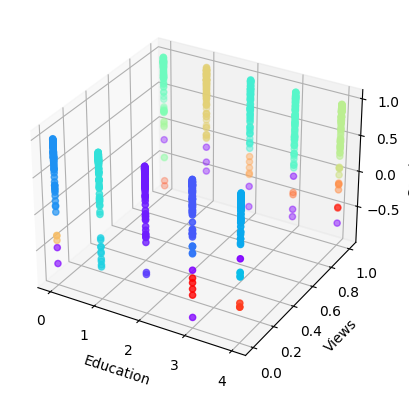

In [275]:
fig3 = plt.figure()
ax = fig3.add_subplot(111,projection = '3d')
ax.scatter(test['Education'],test['Views'],test['Sentiment'], c = test['Cluster'], cmap = 'rainbow')
ax.set_xlabel('Education')
ax.set_ylabel('Views')
ax.set_zlabel('Sentiment')
fig3.show()

In [ ]:
#Elbow method

In [265]:
import numpy as np

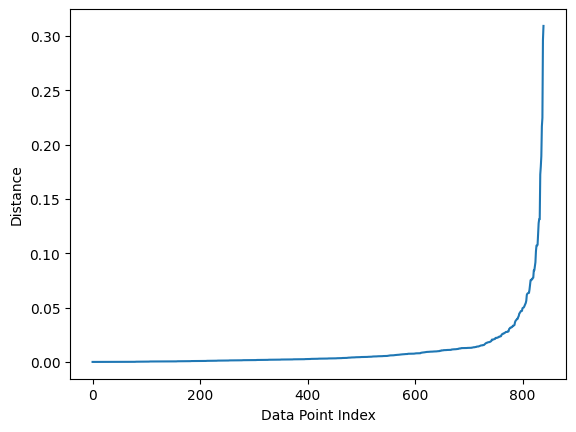

In [266]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2).fit(test[['Education','Views','Sentiment']])
distance,indices = nn.kneighbors(test[['Education','Views','Sentiment']])

distances = np.sort(distance[:,1])
plt.plot(distances)
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

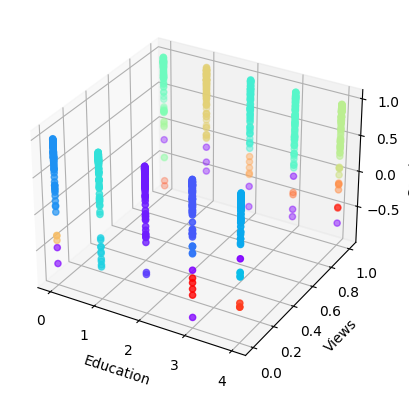

In [ ]:
fig3 = plt.figure()
ax = fig3.add_subplot(111,projection = '3d')
ax.scatter(test['Education'],test['Views'],test['Sentiment'], c = test['Cluster'], cmap = 'rainbow')
ax.set_xlabel('Education')
ax.set_ylabel('Views')
ax.set_zlabel('Sentiment')
fig3.show()

The above graph shows how Education and Views can be clustered into different groups based on the Sentiment score. The sentiment score is the compound stastic which can be obtained during sentement analysis and I defined the different groups which maked up education (5 categories)  and views (2 categories) . The question I asked the model was "Do you think AI will take over the world?". I expected the pessimistic personas and those with lower education levels would have heavily neagative views, however the model surprised me and the sentiment for most of the responses is positive. I believe this is because the model has given a peaceful tone for most of the responses generated. This is evident because even for the ridiculus question asked in control 2 "Should we tickle people when we first meet them instead of shaking hands?" the responses fell in a sprecturm of sentiments.